In [28]:
import os
import h5py 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### set path to pull data from lims & separate directory for saving figures

Rbp4-Cre_KL100;Camk2a-tTA;Ai93-328341   
VISal   
375   
2017-09-06 

In [29]:
mouse_id = 328341

In [30]:
ophys_session_dir = r"\\allen\programs\braintv\production\neuralcoding\prod0\specimen_594684843\ophys_session_638364098"

In [31]:
analysis_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\BehaviorImaging\DoC\2P6_data_analysis'

### get dataset object

In [32]:
from visual_behavior_ophys.dataset.visual_behavior_scientifica_dataset import VisualBehaviorScientificaDataset

In [33]:
dataset= VisualBehaviorScientificaDataset(ophys_session_dir, mouse_id, analysis_dir = analysis_dir)

Visual frames detected in sync: 58861
2P frames detected in sync: 30614
170925
visual frames in pkl file: 58861
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M328341\output\170925170312-task=DoC_NaturalImages_Ophys_SessionA_stage=natural_images_ophys_sessionA_mouse=M328341.pkl
stim type is  images
filter edge cells = True
length of traces: 30612
number of segmented cells: 54


### look at things available in dataset object

In [49]:
cell = 39

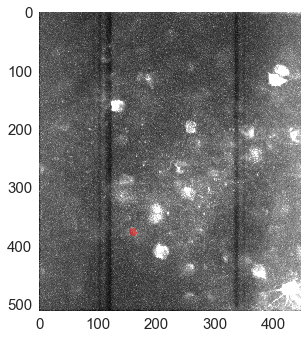

In [50]:
plt.imshow(dataset.max_projection,cmap='gray',vmax=np.amax(dataset.max_projection)/2.)
roi_mask = dataset.roi_mask_array[cell]
roi_mask[roi_mask==0] = np.nan
plt.imshow(roi_mask,cmap='hsv',alpha=0.5)
plt.grid(False)

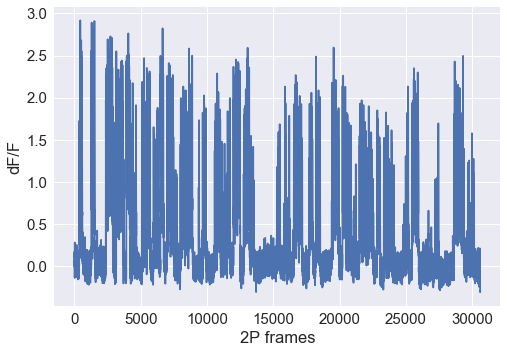

In [51]:
plt.plot(dataset.dff_traces[cell])
plt.ylabel('dF/F')
plt.xlabel('2P frames')

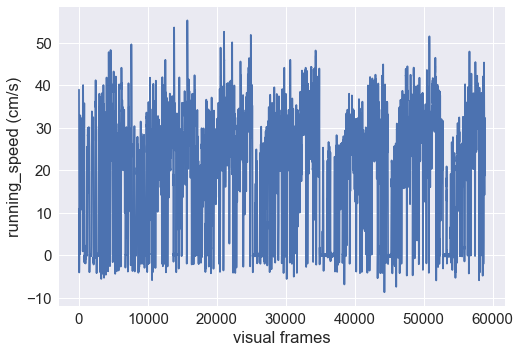

In [54]:
plt.plot(dataset.running_speed)
plt.ylabel('running_speed (cm/s)')
plt.xlabel('visual frames')
# plt.xlim(152000,155000)

In [53]:
dataset.sync

{'2PFrames': {'timestamps': array([  441.02428,   441.05658,   441.08887, ...,  1429.74589,
          1429.77819,  1429.81049])},
 'cam1_exposure': {'timestamps': array([  4.43070000e-01,   4.63710000e-01,   4.79580000e-01, ...,
           1.43007321e+03,   1.43010664e+03,   1.43014756e+03])},
 'cam2_exposure': {'timestamps': array([  5.17590000e-01,   5.34310000e-01,   5.38520000e-01, ...,
           1.43046339e+03,   1.43049670e+03,   1.43053410e+03])},
 'lickTimes_0': {'timestamps': array([  460.95689,   461.46498,   464.0164 ,   467.16174,   472.86219,
           473.00304,   473.12571,   473.36258,   473.6172 ,   473.74928,
           473.87238,   473.98673,   474.11887,   474.25102,   474.37412,
           474.49718,   474.62016,   474.87492,   475.01578,   475.13919,
           475.25367,   475.36848,   475.49252,   475.62591,   475.78533,
           475.92627,   476.04077,   476.18217,   476.33217,   476.50895,
           476.79919,   476.93126,   483.36495,   483.86613,   484.

In [39]:
dataset.stim_table.head()

change_trial  total_trial  change_frame  change_time  initial_code  \
0             0            0           270    451.87509             7   
1             1            1           765    460.13192             6   
2             2            2          1485    472.14168             2   
3             3            3          2070    481.89961             1   
4             4            8          2565    490.15642             3   

   change_code   initial_image    change_image trial_type  \
0            6  img085_VH.tiff  img077_VH.tiff         go   
1            2  img077_VH.tiff  img063_VH.tiff         go   
2            1  img063_VH.tiff  img062_VH.tiff         go   
3            3  img062_VH.tiff  img065_VH.tiff         go   
4            0  img065_VH.tiff  img061_VH.tiff         go   

   behavioral_response behavioral_response_type  
0                  0.0                     MISS  
1                  0.0                     MISS  
2                  0.0                     MISS  
3                  0.0                     MISS  
4                  0.0                     MISS

### use plotting functions

In [40]:
from visual_behavior_ophys.plotting_tools import summary_figures as sf

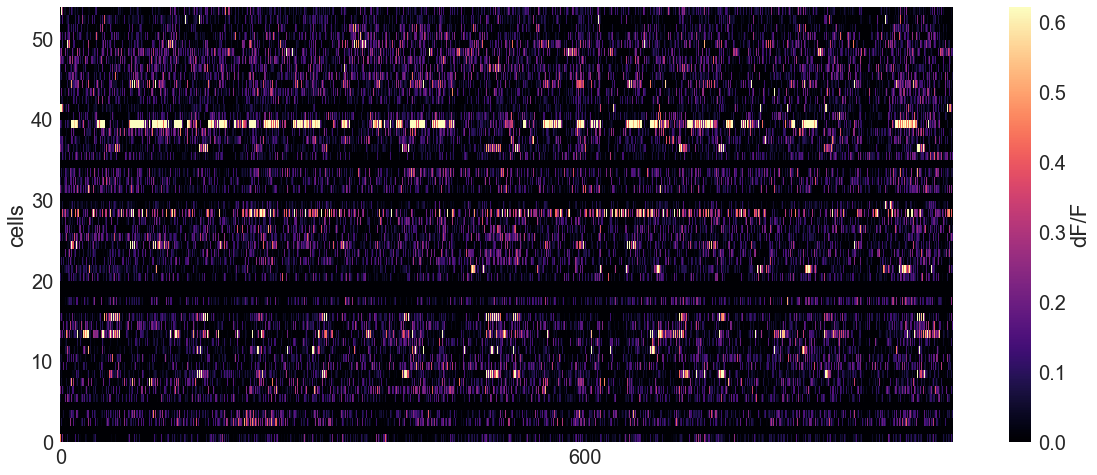

In [41]:
sf.plot_traces_heatmap(dataset, save=True, cbar=True, ax=None)

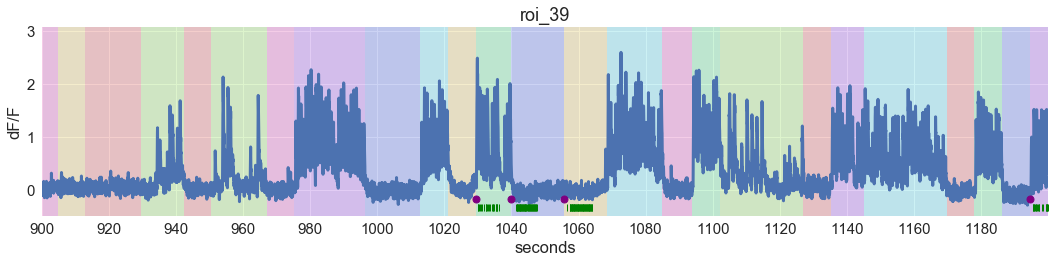

In [59]:
sf.plot_behavior_events_trace(dataset, [cell], xmin=900, length=5, ax=None, save=False)

### generate trial by trial response dataframe

In [60]:
from visual_behavior_ophys.response_analysis.response_analysis import ResponseAnalysis 

In [61]:
ra = ResponseAnalysis(dataset)

length of traces: 30612
number of segmented cells: 54
loading response dataframe
done


In [62]:
ra.response_df.head()

cell  trial                                           response  \
0     0      0  [-0.0445906164279, 0.0404793086922, 0.07431872...   
1     1      0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2     2      0  [-0.134686874498, -0.170469381819, -0.14362699...   
3     3      0  [0.0656577251332, -0.0372129115332, 0.00734594...   
4     4      0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                 response_timestamps  response_window_mean  \
0  [447.87048, 447.90277, 447.93507, 447.96736, 4...              -0.00363   
1  [447.87048, 447.90277, 447.93507, 447.96736, 4...                   NaN   
2  [447.87048, 447.90277, 447.93507, 447.96736, 4...              -0.00372   
3  [447.87048, 447.90277, 447.93507, 447.96736, 4...              -0.00468   
4  [447.87048, 447.90277, 447.93507, 447.96736, 4...                   NaN   

   baseline_window_mean   p_value  sd_over_baseline  \
0             -0.030243  0.222610         -0.078253   
1                   NaN       NaN               NaN   
2             -0.055497  0.194756         -0.034297   
3             -0.077705  0.051632         -0.071981   
4                   NaN       NaN               NaN   

                                           run_speed  \
0  [4.68655114367, 2.86697973238, 1.48299135236, ...   
1  [4.68655114367, 2.86697973238, 1.48299135236, ...   
2  [4.68655114367, 2.86697973238, 1.48299135236, ...   
3  [4.68655114367, 2.86697973238, 1.48299135236, ...   
4  [4.68655114367, 2.86697973238, 1.48299135236, ...   

                                      run_timestamps           ...             \
0  [447.87186, 447.88854, 447.90522, 447.92189, 4...           ...              
1  [447.87186, 447.88854, 447.90522, 447.92189, 4...           ...              
2  [447.87186, 447.88854, 447.90522, 447.92189, 4...           ...              
3  [447.87186, 447.88854, 447.90522, 447.92189, 4...           ...              
4  [447.87186, 447.88854, 447.90522, 447.92189, 4...           ...              

   total_trial  change_frame change_time  initial_code  change_code  \
0            0           270   451.87509             7            6   
1            0           270   451.87509             7            6   
2            0           270   451.87509             7            6   
3            0           270   451.87509             7            6   
4            0           270   451.87509             7            6   

    initial_image    change_image  trial_type  behavioral_response  \
0  img085_VH.tiff  img077_VH.tiff          go                  0.0   
1  img085_VH.tiff  img077_VH.tiff          go                  0.0   
2  img085_VH.tiff  img077_VH.tiff          go                  0.0   
3  img085_VH.tiff  img077_VH.tiff          go                  0.0   
4  img085_VH.tiff  img077_VH.tiff          go                  0.0   

  behavioral_response_type  
0                     MISS  
1                     MISS  
2                     MISS  
3                     MISS  
4                     MISS  

[5 rows x 24 columns]

In [63]:
ra.response_df.keys()

Index([u'cell', u'trial', u'response', u'response_timestamps',
       u'response_window_mean', u'baseline_window_mean', u'p_value',
       u'sd_over_baseline', u'run_speed', u'run_timestamps', u'mean_run_speed',
       u'change_trial', u'lick_times', u'reward_rate', u'total_trial',
       u'change_frame', u'change_time', u'initial_code', u'change_code',
       u'initial_image', u'change_image', u'trial_type',
       u'behavioral_response', u'behavioral_response_type'],
      dtype='object')

### plot response for all trials, locked to change time

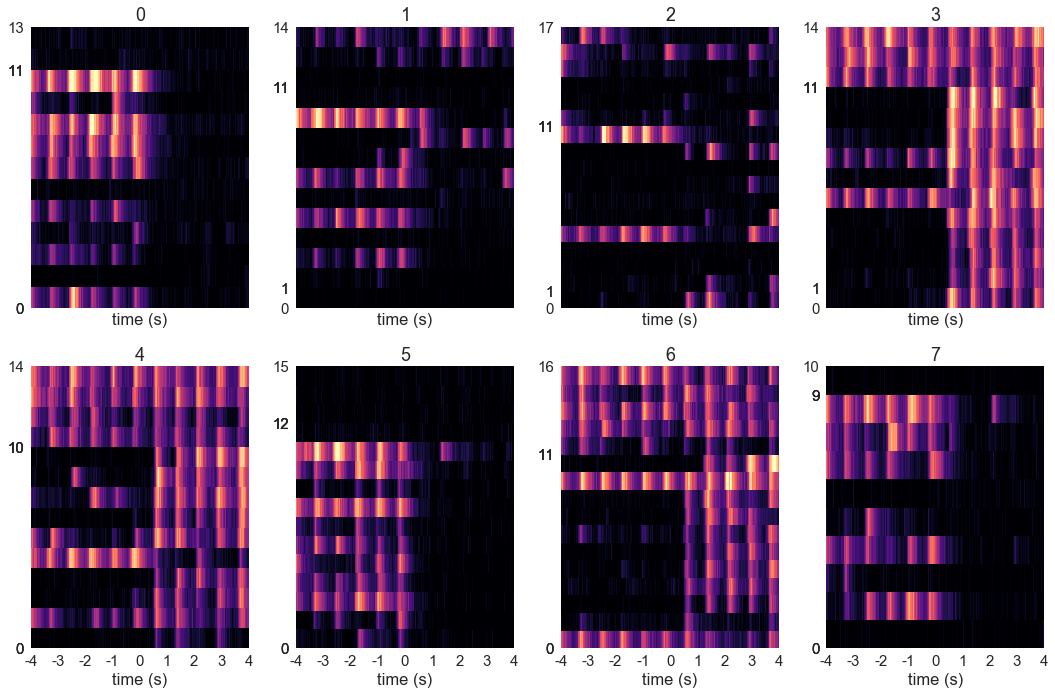

In [64]:
sf.plot_transition_type_heatmap(ra, [cell], vmax=np.percentile(dataset.dff_traces[cell, :], 99.9), ax=None, cmap='magma', colorbar=False);

### identify cell's preferred image

In [65]:
image_name = dataset.stim_codes[dataset.stim_codes.stim_code==0].image_name.values[0]
plt.imshow(dataset.pkl['image_dict'][image_name][image_name],cmap='gray')
plt.grid(False)

KeyError: 'img061_VH.tiff'